In [1]:
import pandas as pd

df = pd.read_csv("../data/train.csv")
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [2]:
#PRINTING NUMBER OF FEATURES AND NUMBER OF ROWS
rows, cols = df.shape
print("Rows:", rows)
print("Features:", cols)

Rows: 101763
Features: 23


In [3]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [4]:
import numpy as np
import pandas as pd

summary = []

for col in df.columns:
    series = df[col]
    
    # Determine type
    if series.dtype == 'object':
        col_type = "categorical"
    elif series.dtype == 'bool':
        col_type = "boolean"
    else:
        col_type = "numerical"
    
    # Values or range
    if col_type == "categorical":
        values = ", ".join(map(str, series.unique()[:10]))
    elif col_type == "boolean":
        values = str(series.unique().tolist())
    else:
        values = f"{series.min()} – {series.max()}"
    
    # Missing count
    missing = series.isnull().sum()
    
    # Outlier detection
    if col_type == "numerical":
        try:
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outliers = ((series < lower) | (series > upper)).sum()
        except Exception:
            outliers = "error"
    else:
        outliers = "N/A"
    
    summary.append([col, col_type, values, missing, outliers])

summary_df = pd.DataFrame(summary, columns=["Feature", "Type", "Values / Range", "Missing", "Outliers"])
summary_df


,Feature,Type,Values / Range,Missing,Outliers
0,id,numerical,0 – 101762,0,0
1,loc,numerical,1.0 – 3442.0,0,8954
2,v(g),numerical,1.0 – 404.0,0,9029
3,ev(g),numerical,1.0 – 165.0,0,10855
4,iv(g),numerical,1.0 – 402.0,0,6954
5,n,numerical,0.0 – 8441.0,0,7834
6,v,numerical,0.0 – 80843.08,0,8883
7,l,numerical,0.0 – 1.0,0,5192
8,d,numerical,0.0 – 418.2,0,5490
9,i,numerical,0.0 – 569.78,0,4885


In [5]:
df["defects"] = df["defects"].astype(int)
df["defects"].unique()

array([0, 1])

In [6]:
print(df["defects"].value_counts())
print(df["defects"].value_counts(normalize=True))

defects
0    78699
1    23064
Name: count, dtype: int64
defects
0    0.773356
1    0.226644
Name: proportion, dtype: float64


In [7]:
df.to_csv("../data/train_clean.csv", index=False)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/train_clean.csv")
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [9]:
# Drop 'id' for ML / visualization
df_ml = df.drop(columns=["id"])

# Separate features and target
features = df_ml.drop(columns=["defects"])

# Identify numerical and categorical features
numerical_features = features.select_dtypes(include=["int64", "float64"]).columns
categorical_features = features.select_dtypes(include=["object", "category", "bool"]).columns

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')
Categorical features: Index([], dtype='object')


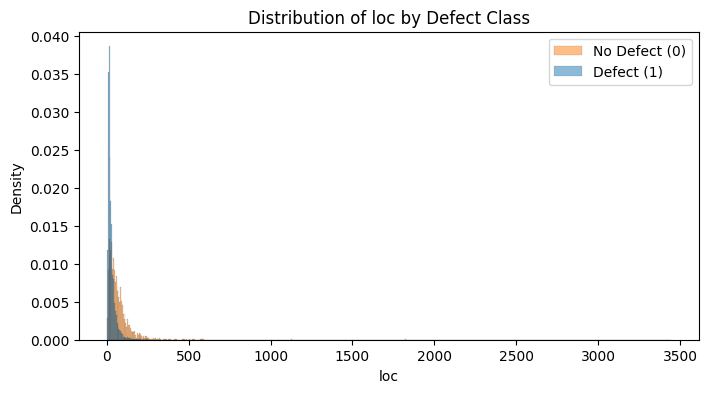

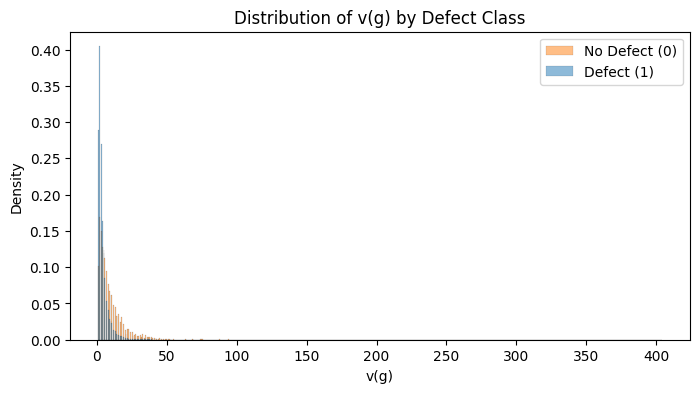

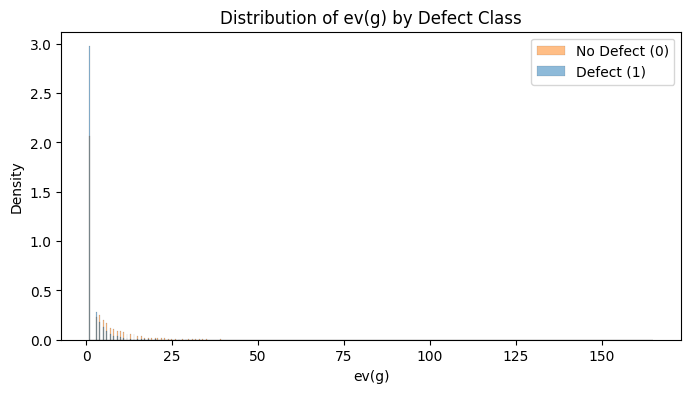

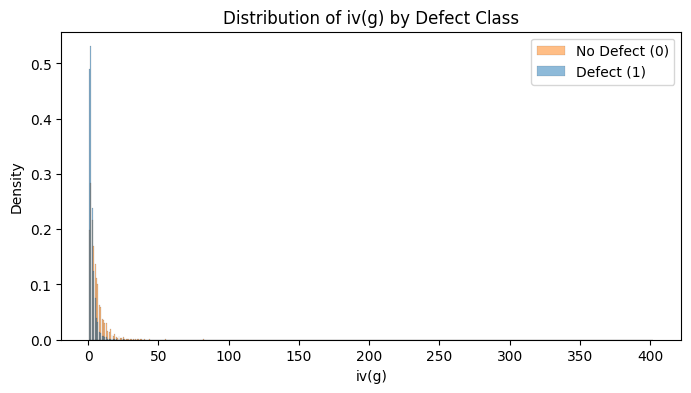

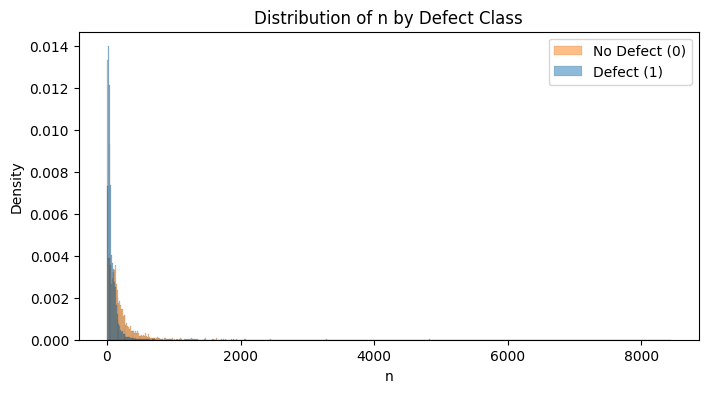

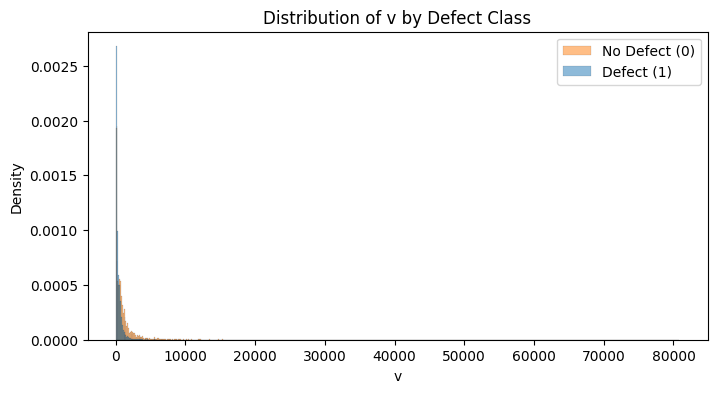

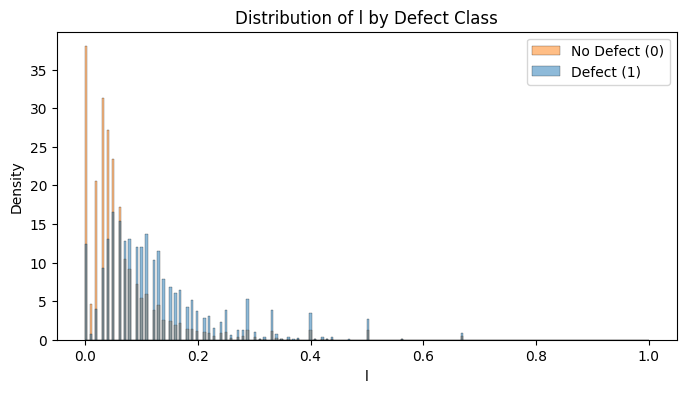

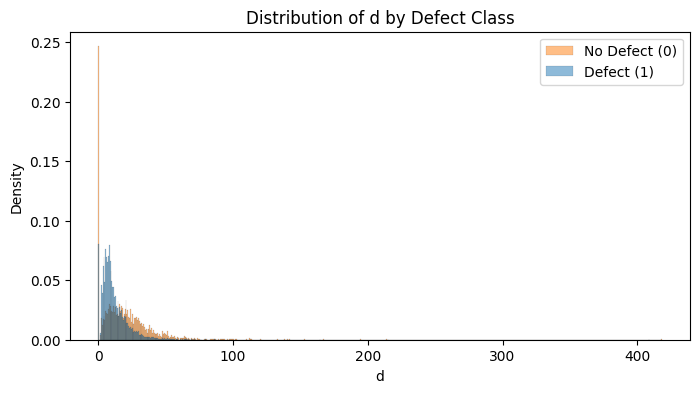

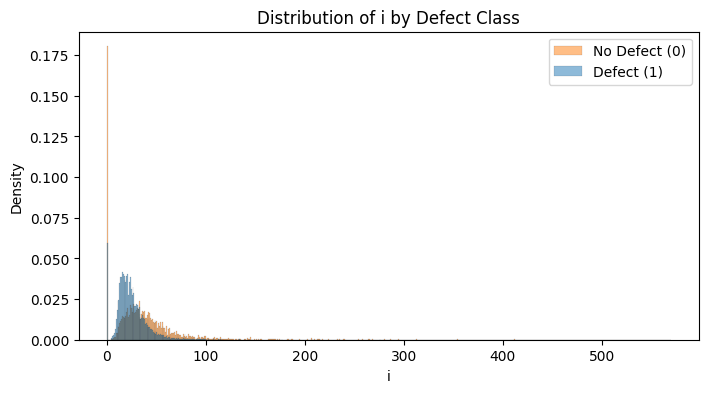

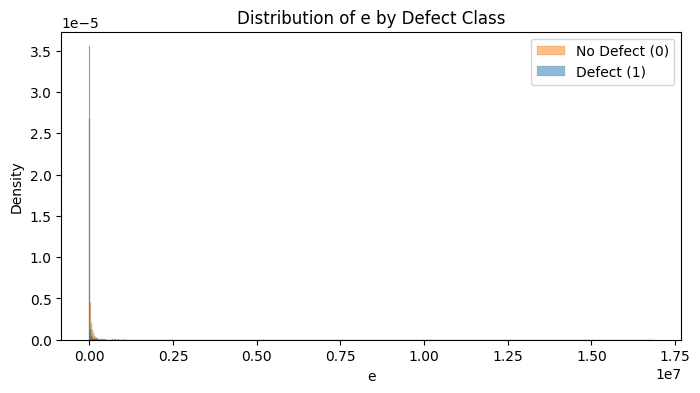

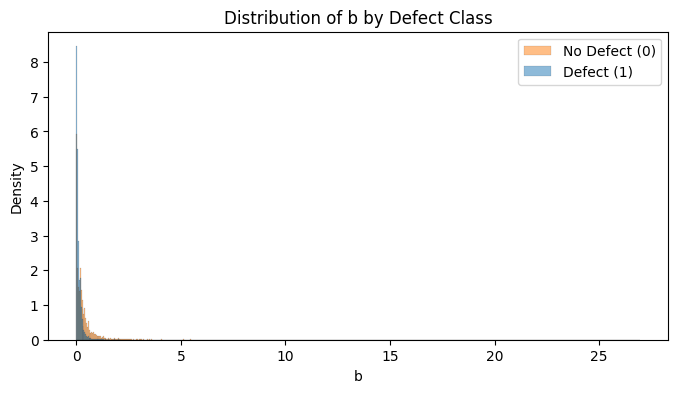

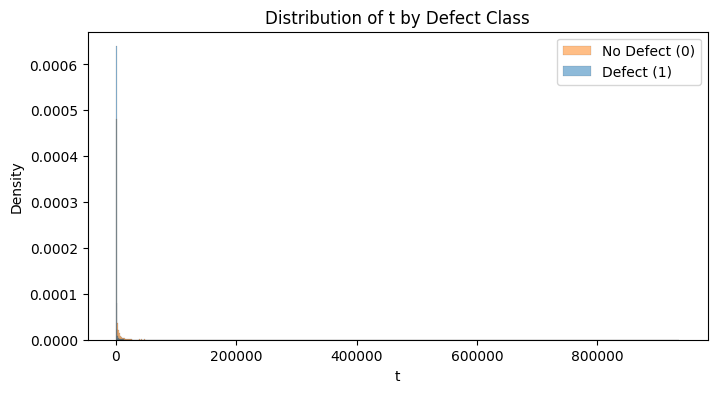

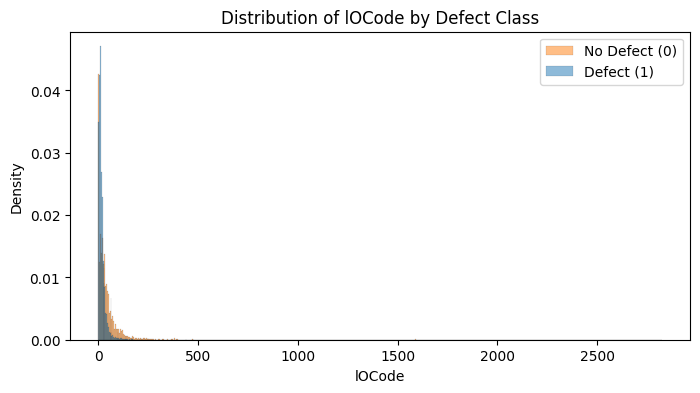

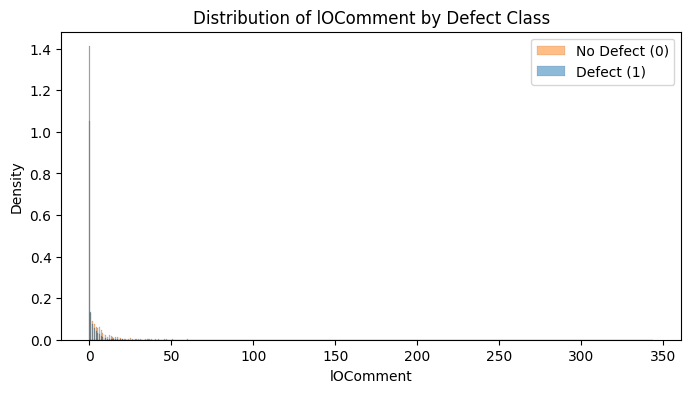

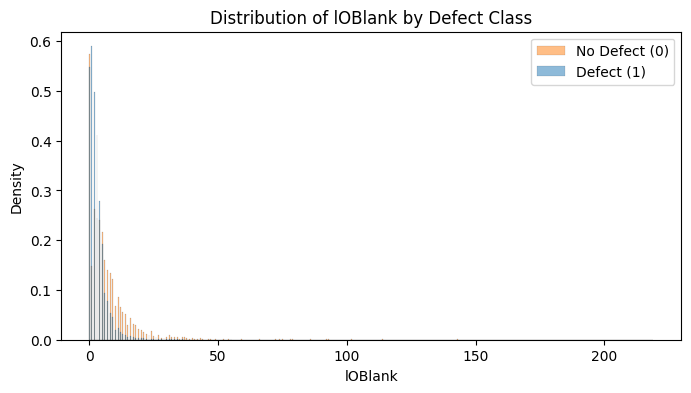

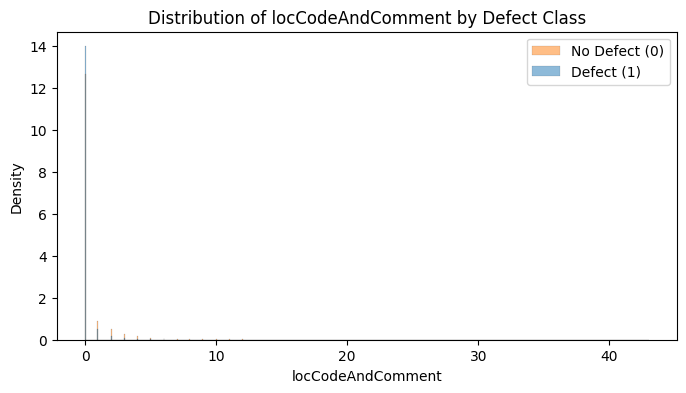

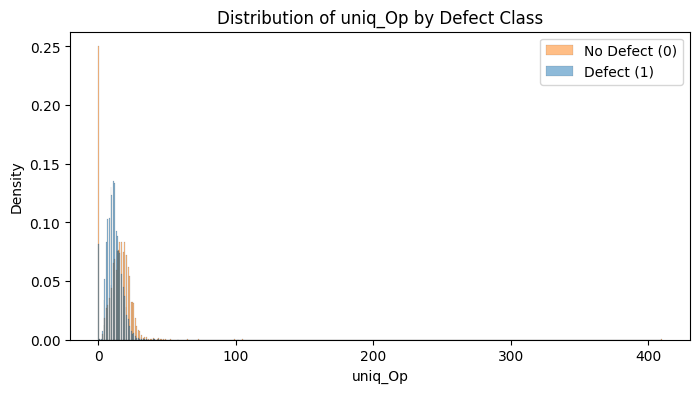

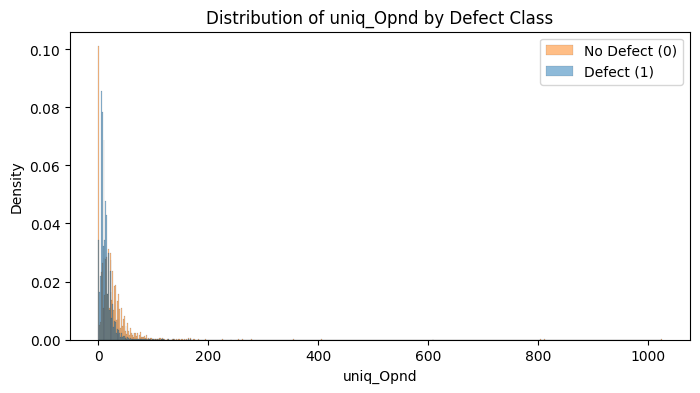

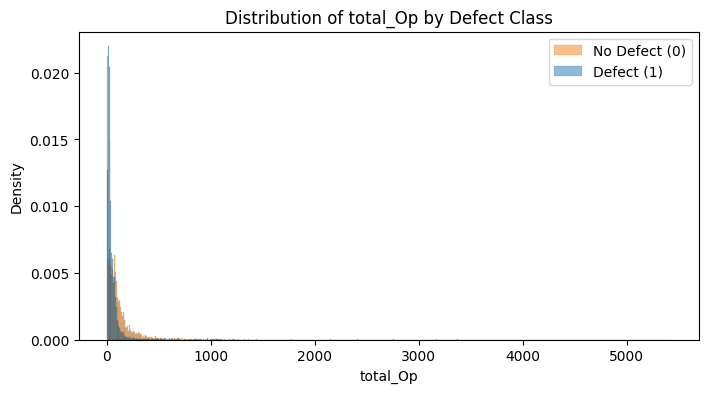

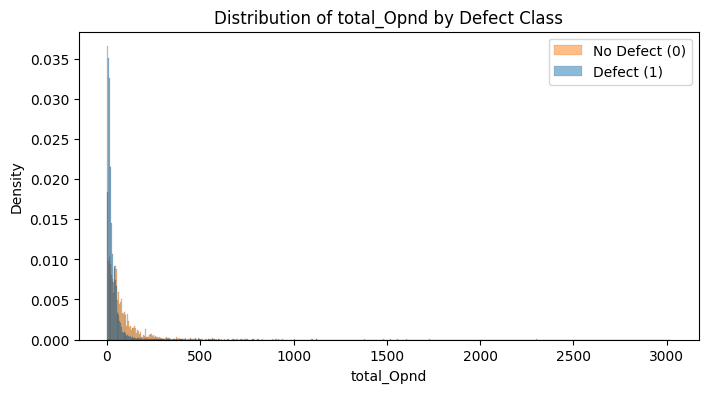

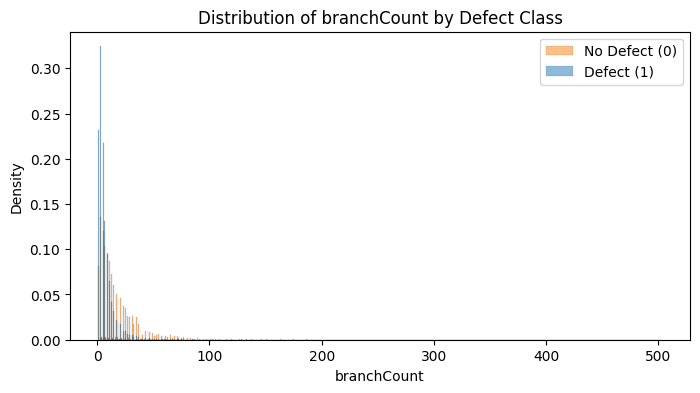

In [10]:
numerical_features = [col for col in numerical_features if col != "id"]
# Plot histograms for numerical features
for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_ml, x=col, hue="defects", kde=False, stat="density", common_norm=False)
    plt.title(f"Distribution of {col} by Defect Class")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(labels=["No Defect (0)", "Defect (1)"])
    plt.show()

In [11]:
summary_stats = {}

for col in numerical_features:
    stats_by_class = df.groupby("defects")[col].agg(["mean", "median", "std", "min", "max"])
    summary_stats[col] = stats_by_class

# Display all summaries
for feature, stats in summary_stats.items():
    print(f"\n--- {feature} ---")
    display(stats)


--- loc ---


,mean,median,std,min,max
defects,,,,,
0,27.219329,19.0,36.144843,1.0,3442.0
1,71.905350,51.0,84.568143,4.0,2224.0



--- v(g) ---


,mean,median,std,min,max
defects,,,,,
0,4.204463,3.0,5.236932,1.0,404.0
1,9.888354,7.0,12.524562,1.0,404.0



--- ev(g) ---


,mean,median,std,min,max
defects,,,,,
0,2.193344,1.0,3.234127,1.0,133.0
1,5.068678,1.0,7.249367,1.0,165.0



--- iv(g) ---


,mean,median,std,min,max
defects,,,,,
0,2.762919,2.0,3.878967,1.0,402.0
1,6.009886,4.0,8.698204,1.0,402.0



--- n ---


,mean,median,std,min,max
defects,,,,,
0,72.744635,45.0,115.774046,0.0,8441.0
1,178.246358,108.5,273.675219,0.0,5669.0



--- v ---


,mean,median,std,min,max
defects,,,,,
0,379.242336,202.050,836.532941,0.0,80843.08
1,1080.952670,554.505,2087.306593,0.0,55140.81



--- l ---


,mean,median,std,min,max
defects,,,,,
0,0.125356,0.10,0.101461,0.0,1.00
1,0.064811,0.04,0.079031,0.0,0.67



--- d ---


,mean,median,std,min,max
defects,,,,,
0,11.832374,9.00,10.882076,0.0,418.2
1,19.992771,16.67,20.598222,0.0,418.2



--- i ---


,mean,median,std,min,max
defects,,,,,
0,24.992160,22.06,17.852887,0.0,569.78
1,36.379374,31.58,33.425633,0.0,569.78



--- e ---


,mean,median,std,min,max
defects,,,,,
0,11015.031194,1774.99,115280.003327,0.0,12120796.16
1,54424.728002,9793.69,336808.795900,0.0,16846621.12



--- b ---


,mean,median,std,min,max
defects,,,,,
0,0.126047,0.07,0.265608,0.0,18.38
1,0.360409,0.18,0.708505,0.0,26.95



--- t ---


,mean,median,std,min,max
defects,,,,,
0,609.609253,99.04,5957.835582,0.0,673377.60
1,2955.791438,544.09,17430.730138,0.0,935923.39



--- lOCode ---


,mean,median,std,min,max
defects,,,,,
0,17.573768,12.0,27.220173,0,2824
1,40.643774,26.0,60.118393,0,1739



--- lOComment ---


,mean,median,std,min,max
defects,,,,,
0,1.117625,0.0,3.748257,0,206
1,4.013441,0.0,9.964590,0,344



--- lOBlank ---


,mean,median,std,min,max
defects,,,,,
0,3.089074,2.0,4.467775,0,219
1,7.019424,4.0,9.983721,0,219



--- locCodeAndComment ---


,mean,median,std,min,max
defects,,,,,
0,0.124601,0.0,0.708733,0,38
1,0.442291,0.0,1.615747,0,43



--- uniq_Op ---


,mean,median,std,min,max
defects,,,,,
0,11.244006,11.0,5.418161,0.0,155.0
1,14.121315,15.0,9.717754,0.0,410.0



--- uniq_Opnd ---


,mean,median,std,min,max
defects,,,,,
0,13.189901,11.0,12.563003,0.0,811.0
1,23.809053,19.0,28.531622,0.0,1026.0



--- total_Op ---


,mean,median,std,min,max
defects,,,,,
0,43.450018,27.0,71.264033,0.0,5420.0
1,106.006634,65.0,166.920801,0.0,3368.0



--- total_Opnd ---


,mean,median,std,min,max
defects,,,,,
0,29.440183,18.0,48.079757,0.0,3021.0
1,72.721731,44.0,115.506056,0.0,3021.0



--- branchCount ---


,mean,median,std,min,max
defects,,,,,
0,7.320728,5.0,9.645063,1.0,485.0
1,18.434270,13.0,22.441229,1.0,503.0


All features in this dataset are numerical; there are no categorical features.

Most promising features:
[loc, v(g), ev(g), iv(g), n, v, e, b, t, lOCode, lOComment, lOBlank, locCodeAndComment, uniq_Opnd, total_Op, total_Opnd, branchCount].
These features show clear differences between defect (1) and non-defect (0) classes.

Moderate features:
l, d, i, uniq_Op
These show some differences, but overlap between classes is higher.

In [12]:
df_ml.to_csv("../data/train_clean_final.csv", index=False)

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_csv("../data/train_clean_final.csv")

# Separate features and target
X = df.drop(columns=["defects"])
y = df["defects"]

X.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [14]:
# Selected the promising features identified from visualization
promising_features = [
    'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'e', 'b', 't',
    'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
    'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'
]

X = X[promising_features]

print("Features selected for ML:")
print(X.columns.tolist())


Features selected for ML:
['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


In [15]:
numerical_features = [
    'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'e', 'b', 't',
    'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
    'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'
]

In [16]:
# High-variance features (log-transform to reduce skew)
high_var_features = ['v', 'e', 't', 'total_Op', 'total_Opnd']
X[high_var_features] = X[high_var_features].apply(np.log1p)

# Standard scale all numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


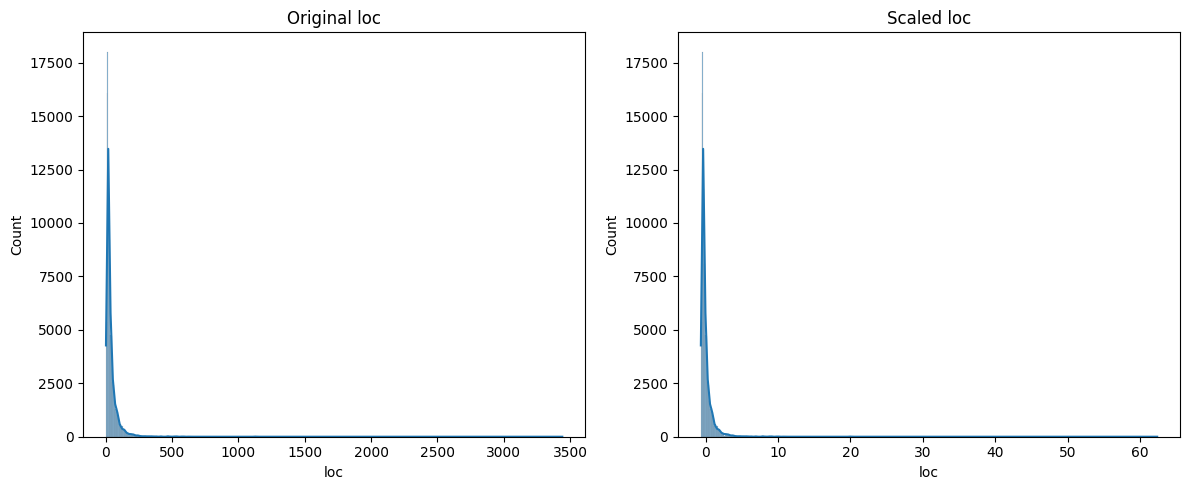

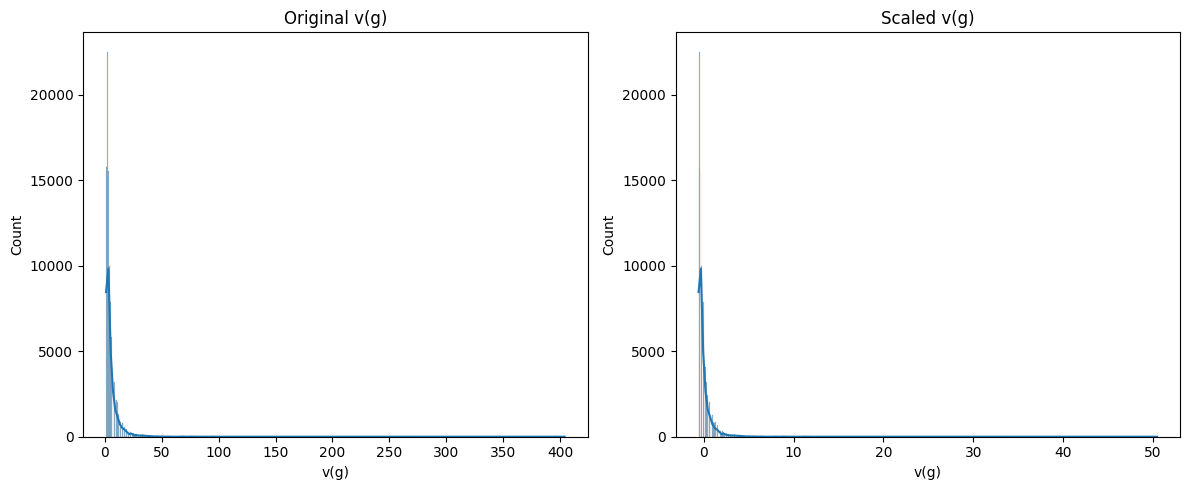

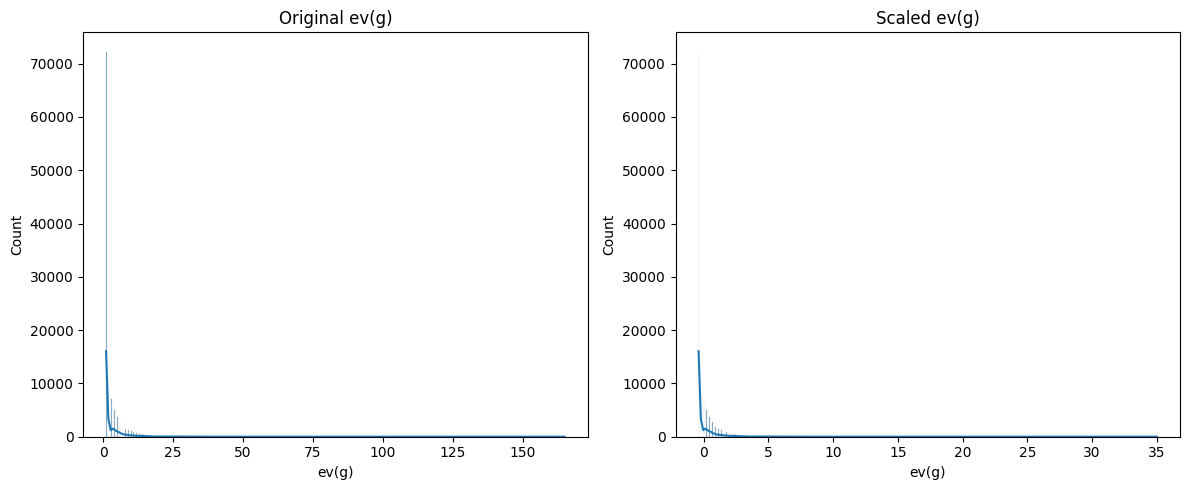

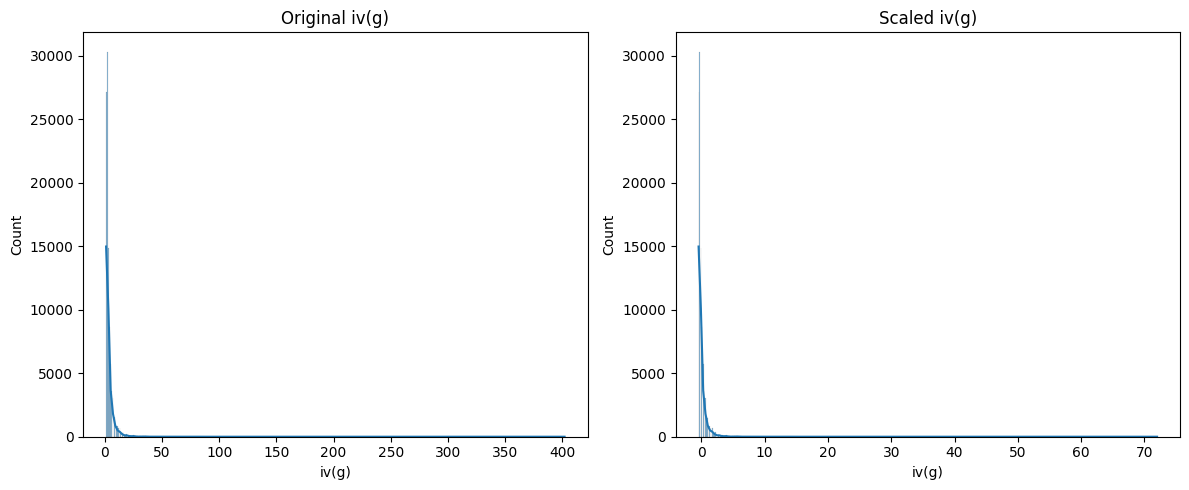

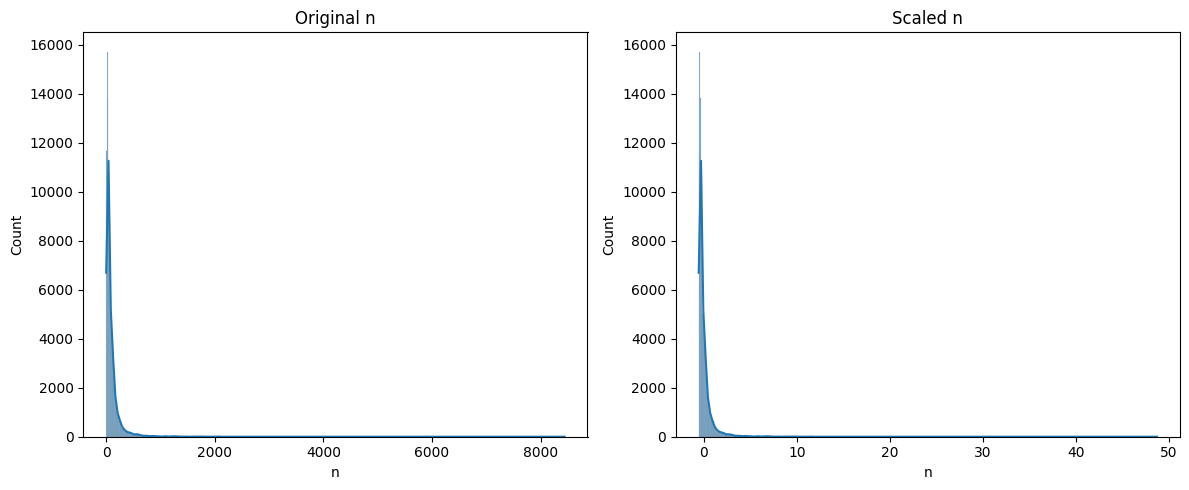

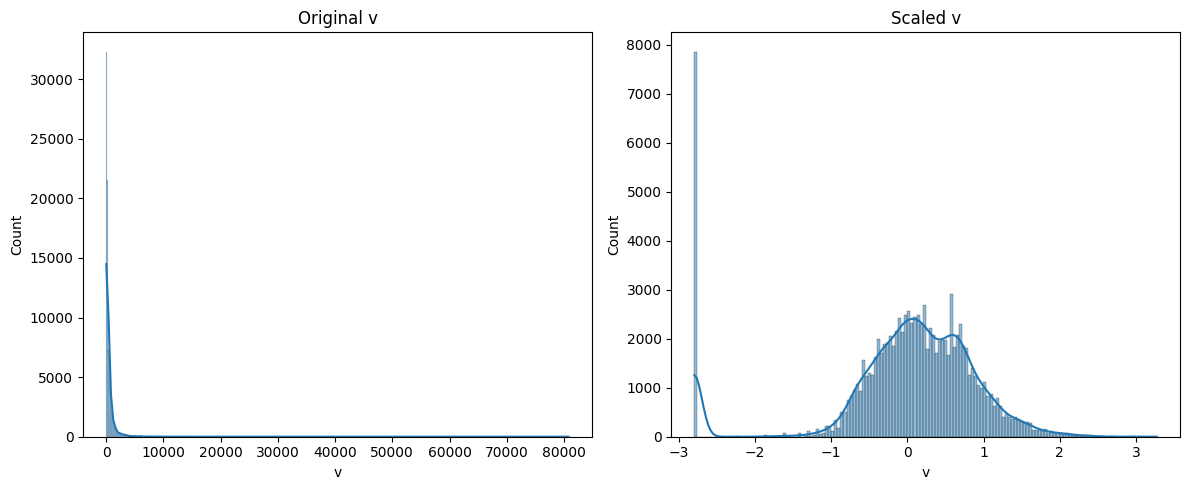

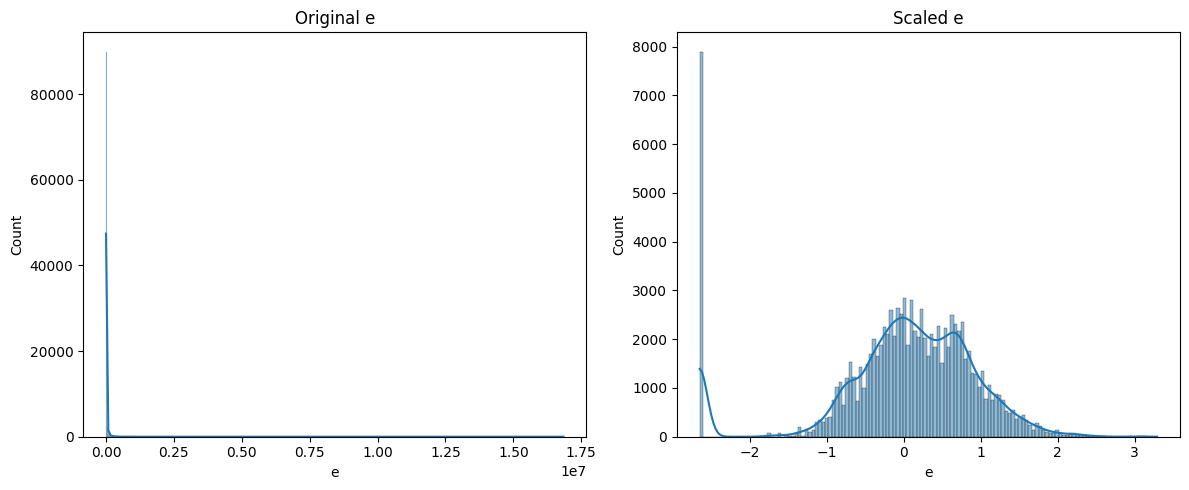

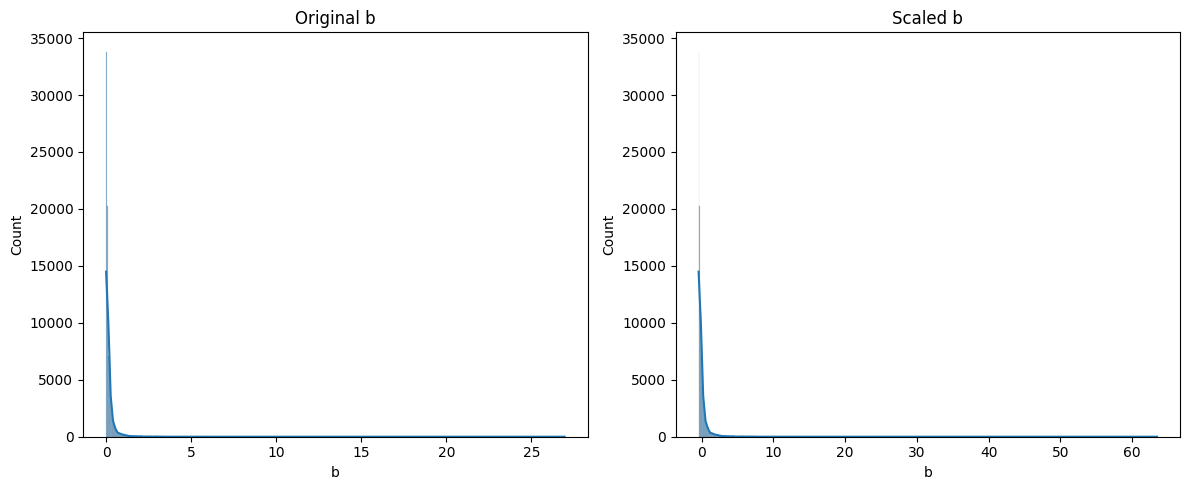

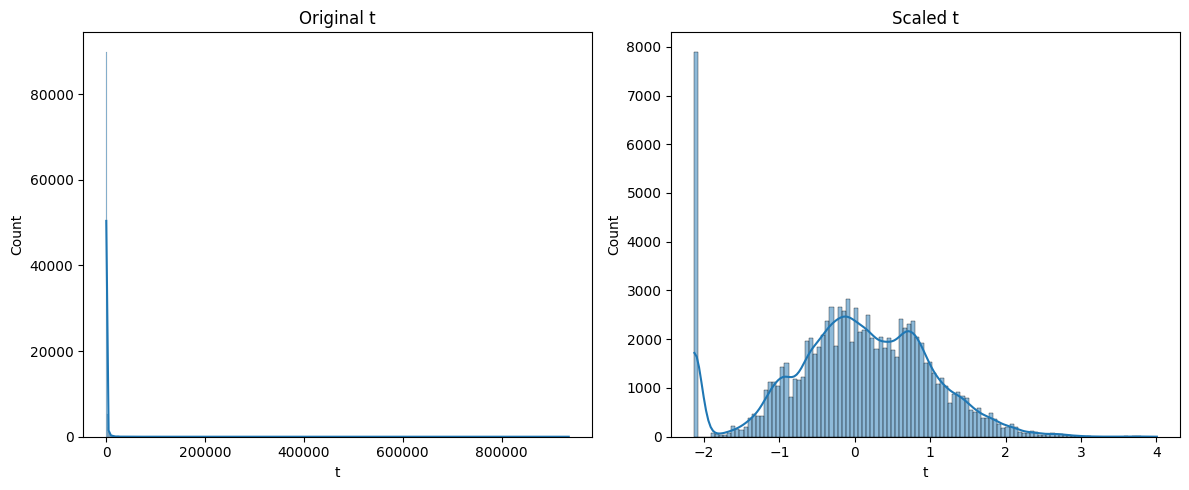

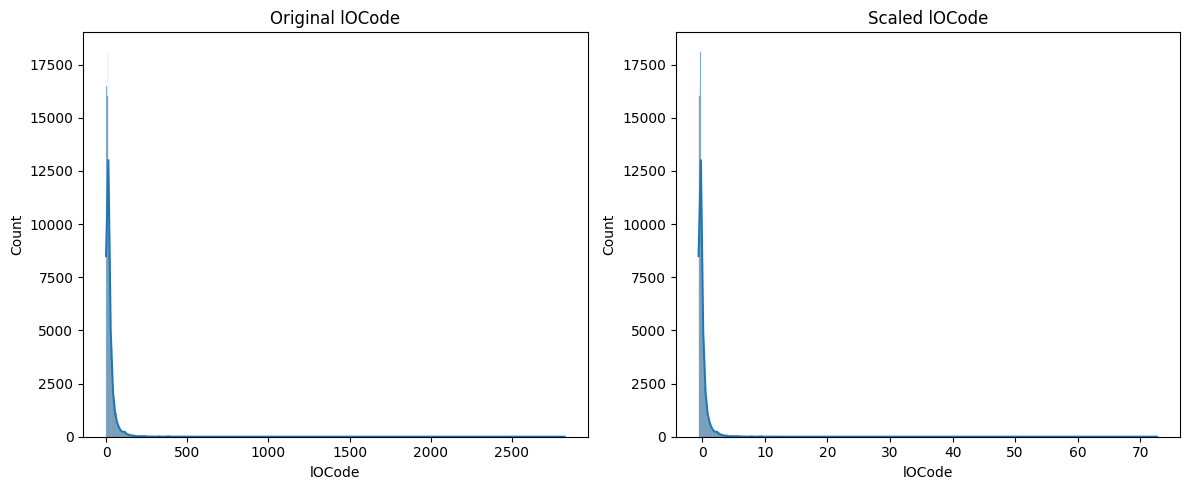

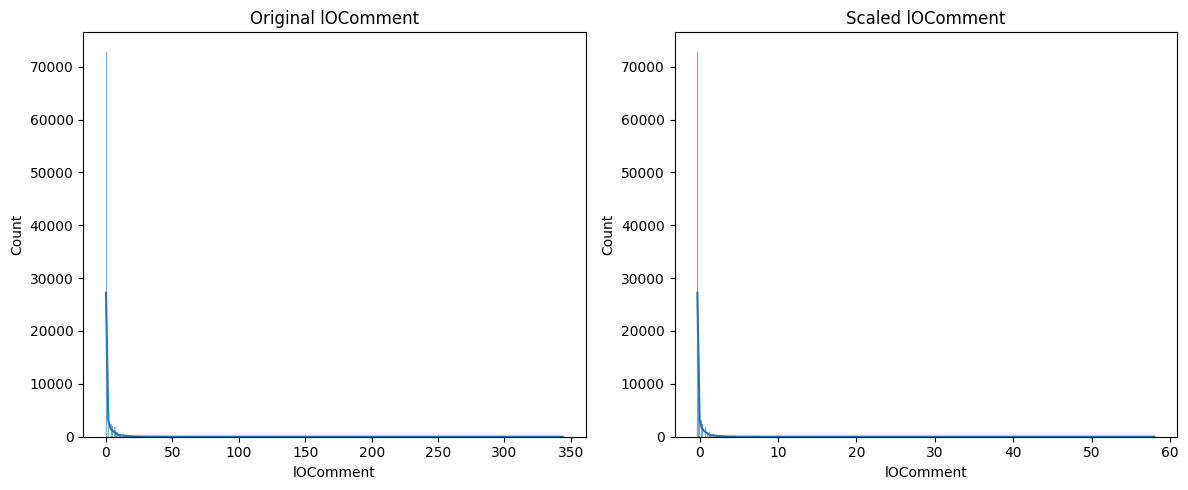

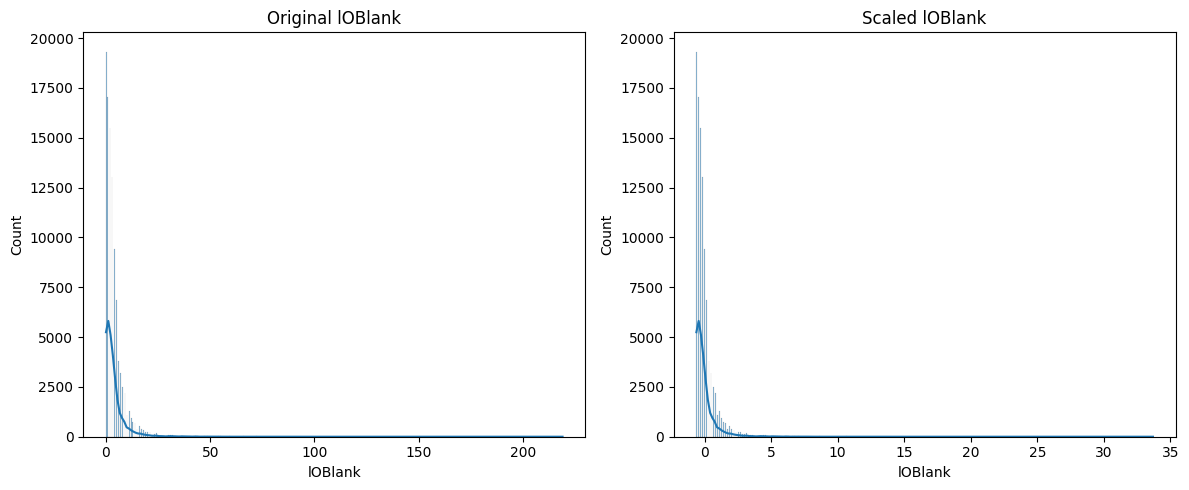

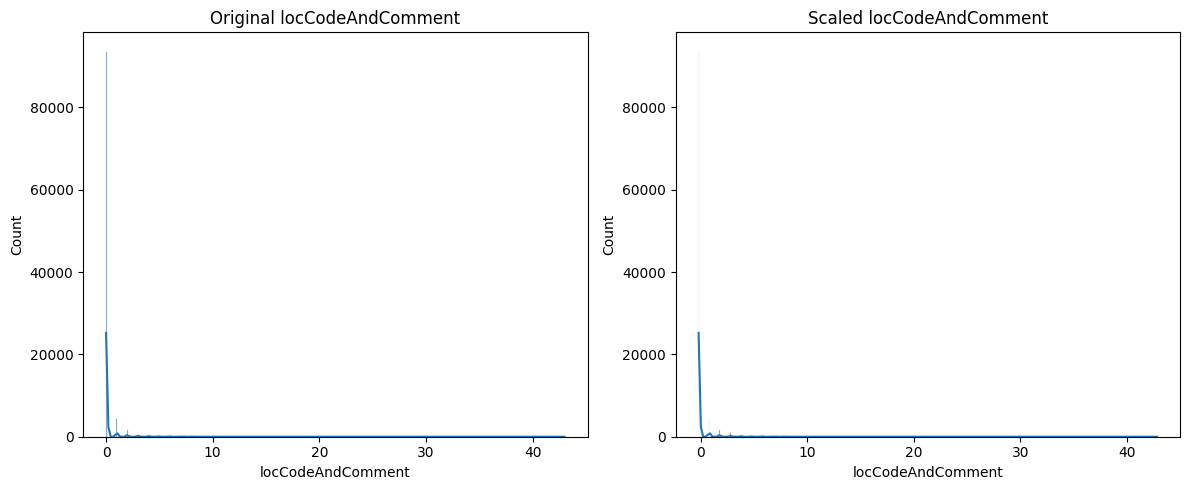

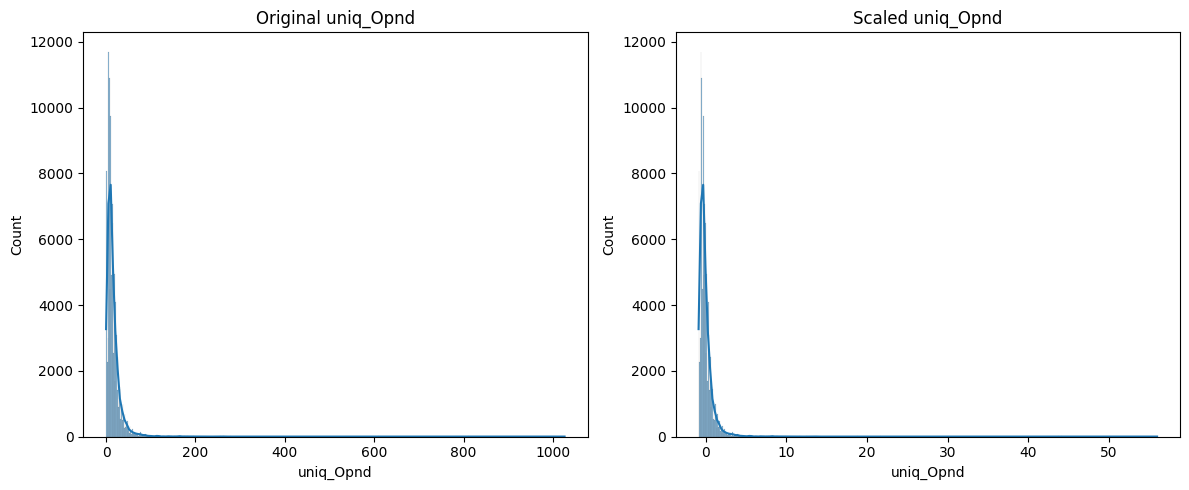

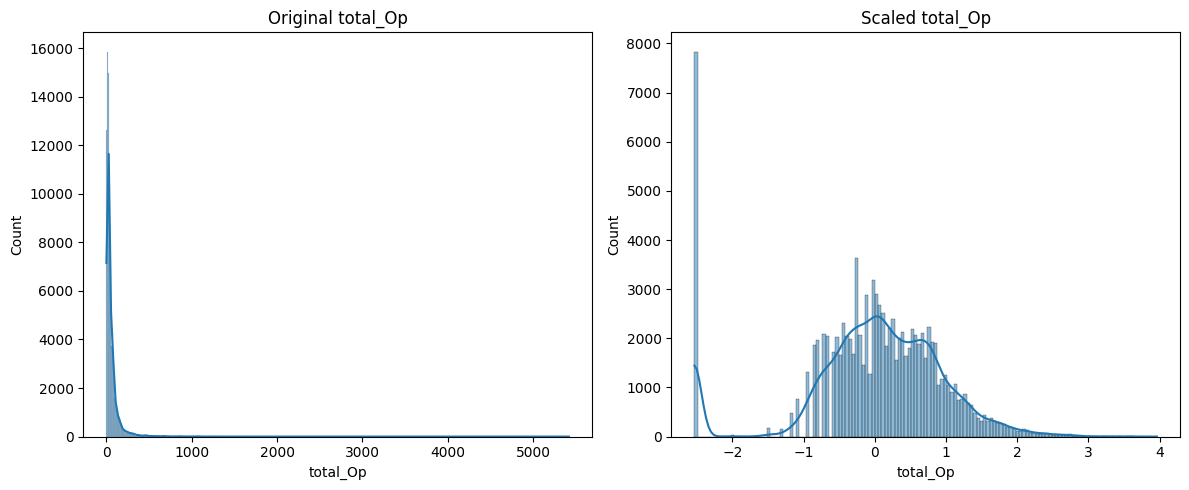

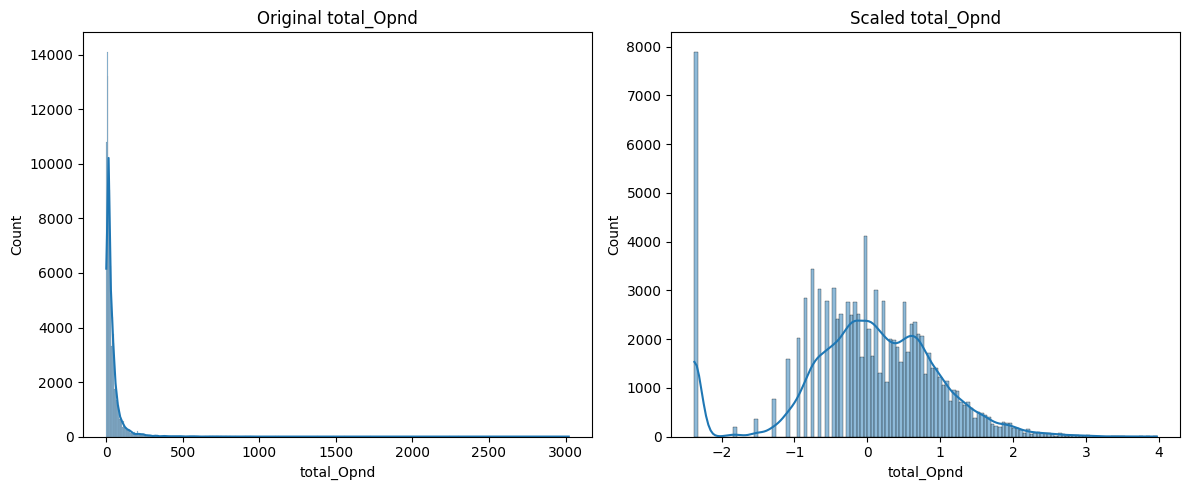

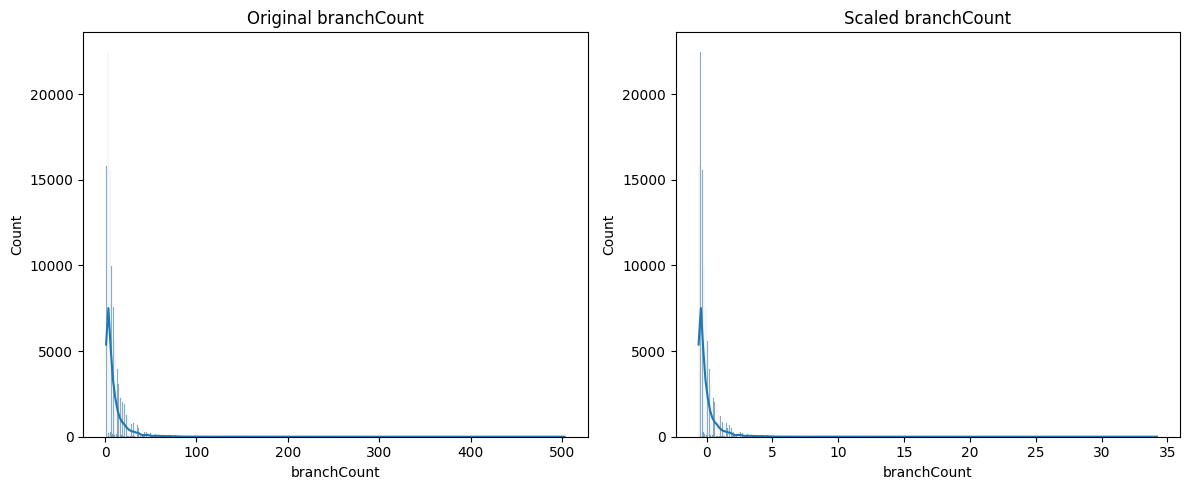

In [17]:
# Visualize all numerical features before and after scaling
for feature in numerical_features:
    plt.figure(figsize=(12,5))

    # Original distribution
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Original {feature}")

    # Scaled distribution
    plt.subplot(1,2,2)
    sns.histplot(X_scaled[feature], kde=True)
    plt.title(f"Scaled {feature}")

    plt.tight_layout()
    plt.show()


In [18]:
df_prepared = pd.concat([X_scaled, y], axis=1)
df_prepared.to_csv("../data/train_prepared.csv", index=False)

In [19]:
df = pd.read_csv("../data/train_prepared.csv")
df.head()

,loc,v(g),ev(g),iv(g),n,v,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-0.281083,-0.315497,-0.398386,-0.270814,-0.214179,0.231328,0.424120,-0.211368,0.422047,-0.150553,-0.131124,-0.466893,-0.19682,-0.365180,0.233234,0.110793,-0.335784,0
1,-0.427603,-0.442066,-0.398386,-0.270814,-0.377782,-0.095076,-0.204178,-0.306190,-0.356593,-0.306233,-0.300547,-0.466893,-0.19682,-0.254463,-0.309951,-0.227723,-0.474550,0
2,-0.482548,-0.442066,-0.398386,-0.270814,-0.301824,0.047711,0.019591,-0.258779,-0.080614,-0.384072,-0.300547,-0.466893,-0.19682,-0.254463,0.009452,-0.083333,-0.474550,0
3,-0.537492,-0.568635,-0.398386,-0.451499,-0.430368,-0.348371,-0.447245,-0.353601,-0.652781,-0.487858,-0.300547,-0.310211,-0.19682,-0.531254,-0.393964,-0.725552,-0.613317,1
4,-0.482548,-0.442066,-0.398386,-0.270814,-0.465426,-0.578114,-0.539402,-0.377307,-0.763474,-0.410019,-0.300547,-0.310211,-0.19682,-0.531254,-0.722779,-0.473351,-0.474550,0


In [20]:
X = df.drop(columns=["defects"])
y = df["defects"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)


(61057, 17) (20353, 17) (20353, 17)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Accuracy: 0.8091681815948509
Precision: 0.6492018010642653
Recall: 0.34381096900065033
F1 Score: 0.44954648526077096

Confusion Matrix:
[[14883   857]
 [ 3027  1586]]


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Precision:", precision_score(y_val, y_pred_gb))
print("Recall:", recall_score(y_val, y_pred_gb))
print("F1 Score:", f1_score(y_val, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_gb))

Accuracy: 0.8156537119834913
Precision: 0.6552470248827984
Recall: 0.393886841534793
F1 Score: 0.49201191443271053

Confusion Matrix:
 [[14784   956]
 [ 2796  1817]]


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Load training data
df_train = pd.read_csv("../data/train_prepared.csv")

# Select features and target
selected_features = [
    "loc", "v(g)", "ev(g)", "iv(g)", "n", "v", "e", "b", "t",
    "lOCode", "lOComment", "lOBlank", "locCodeAndComment",
    "uniq_Opnd", "total_Op", "total_Opnd", "branchCount"
]

X_train = df_train[selected_features].copy()
y_train = df_train["defects"]

# Skewed features for log-transform
skewed_features = ["v", "e", "t"]

# Clip negatives and apply log1p
for col in skewed_features:
    X_train.loc[:, col] = X_train[col].clip(lower=0)

X_train.loc[:, skewed_features] = np.log1p(X_train[skewed_features])

# Fit scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [25]:
# Train Gradient Boosting on prepared training data
gb_final = GradientBoostingClassifier(random_state=42)
gb_final.fit(X_train_scaled, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [26]:
# Load raw test dataset
df_test = pd.read_csv("../data/test.csv")

# Keep only selected features
X_test = df_test[selected_features].copy()

# Fill any missing values using training medians
X_test = X_test.fillna(X_train.median())

# Clip negatives and log-transform skewed features
for col in skewed_features:
    X_test.loc[:, col] = X_test[col].clip(lower=0)

X_test.loc[:, skewed_features] = np.log1p(X_test[skewed_features])

# Scale using the same scaler fitted on training
X_test_scaled = scaler.transform(X_test)

In [27]:
# Generate predictions for test set
test_predictions = gb_final.predict(X_test_scaled)

In [ ]:
# Include 'id' column if it exists in test set
if "id" in df_test.columns:
    submission = pd.DataFrame({
        "id": df_test["id"],
        "defects": test_predictions
    })
else:
    submission = pd.DataFrame({
        "id": range(len(test_predictions)),
        "defects": test_predictions
    })

# Save submission
submission.to_csv("../results/submission.csv", index=False)
print("Submission saved to ../results/submission.csv")
